# Artificial Neural Network

### Importing the libraries

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
tf.__version__

'2.2.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [5]:
#Load Dataset
dataset = pd.read_csv('dataset.csv')
#split DV and IDVs
X = dataset.iloc[:, 3:-1] # Features
y = dataset.iloc[:, -1] # Target variable

In [ ]:
dataset.head()

,age,UR,Literacy,Numeracy,fn,yrsofedu,active_dfs
0,15,1,1,1,0,10,1
1,55,1,1,1,0,10,1
2,62,1,1,1,1,10,1
3,26,1,1,1,1,10,1
4,39,1,1,1,1,10,1


In [ ]:
print(X)

In [ ]:
print(y)

### Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
print(X)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


### Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [8]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [11]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

### Compiling the ANN

In [12]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [24]:
ann.fit(X_train, y_train, batch_size = 6, epochs = 200)

Epoch 1/200
24/24 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 0.7929
Epoch 2/200
24/24 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.8000
Epoch 3/200
24/24 [==============================] - 0s 1ms/step - loss: 0.4128 - accuracy: 0.8000
Epoch 4/200
24/24 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.7929
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8000
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8071
Epoch 7/200
24/24 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8071
Epoch 8/200
24/24 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.8071
Epoch 9/200
24/24 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8000
Epoch 10/200
24/24 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.8000
Epoch 11/

## Part 4 - Model Evaluation

### Predicting the Test set results

In [23]:
#from sklearn.preprocessing import StandardScaler
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

AttributeError: ignored

### Confusion Matrix

In [25]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 6,  4],
       [ 4, 21]])

Text(0.5, 257.44, 'Predicted label')

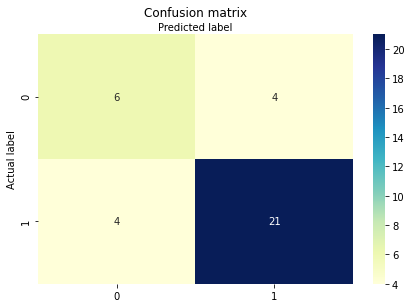

In [26]:
#Plot Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7714285714285715
Precision: 0.84
Recall: 0.84
